In [9]:
# prompt: code bag of word and tfidf

import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!pip install Sastrawi

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

text = 'Mentoring AI GDG Jogjakarta!'

# Tokenization
token = word_tokenize(text)
print("Tokenized:", token)

# Stemming
stemmed_tokens = [stemmer.stem(word) for word in token]
print("Stemmed:", stemmed_tokens)

# Join stemmed tokens back into a string
stemmed_text = " ".join(stemmed_tokens)


# Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([stemmed_text])
print("Bag of Words:", X.toarray())
print("Vocabulary:", vectorizer.vocabulary_)


# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_X = tfidf_vectorizer.fit_transform([stemmed_text])
print("TF-IDF:", tfidf_X.toarray())
print("TF-IDF Vocabulary:", tfidf_vectorizer.vocabulary_)


Tokenized: ['Mentoring', 'AI', 'GDG', 'Jogjakarta', '!']
Stemmed: ['mentoring', 'ai', 'gdg', 'jogjakarta', '']
Bag of Words: [[1 1 1 1]]
Vocabulary: {'mentoring': 3, 'ai': 0, 'gdg': 1, 'jogjakarta': 2}
TF-IDF: [[0.5 0.5 0.5 0.5]]
TF-IDF Vocabulary: {'mentoring': 3, 'ai': 0, 'gdg': 1, 'jogjakarta': 2}


# DEMO

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import os
import re

# Configuration
BASE_URL = 'https://www.detik.com'
URL = 'https://www.detik.com/terpopuler/food'
SAVE_PATH = './food_articles.csv'


def fetch_article_links(url):
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to fetch the main page")
        return []

    soup = BeautifulSoup(response.content, 'html.parser')
    links = set()

    for link in soup.find_all('a', class_='media__link'):
        article_url = link['href']
        if not article_url.startswith('http'):
            article_url = BASE_URL + article_url
        links.add(article_url)

    return list(links)


def extract_article_data(article_url):
    response = requests.get(article_url)
    if response.status_code != 200:
        print(f"Failed to fetch article: {article_url}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')

    title = soup.find('h1').text.strip() if soup.find('h1') else 'No Title'
    date = soup.find('div', class_='detail__date').text.strip() if soup.find('div', class_='detail__date') else 'Unknown'
    author = soup.find('div', class_='detail__author').text.strip() if soup.find('div', class_='detail__author') else 'Unknown'
    content = ' '.join([p.text.strip() for p in soup.find_all('p')])

    # Extract numeric ID from URL or meta tags
    match = re.search(r'/d-(\d+)/', article_url)
    article_id = match.group(1) if match else 'unknown'

    # Extract tags
    tags = ', '.join([tag.text.strip() for tag in soup.find_all('a', class_='nav__tag')])

    return {
        'id': article_id,
        'date': date,
        'title': title,
        'author': author,
        'content': content,
        'tags': tags if tags else 'No Tags',
        'url': article_url
    }


def save_to_csv(data):
    if os.path.exists(SAVE_PATH):
        existing_data = pd.read_csv(SAVE_PATH)
        new_data = pd.DataFrame(data)

        # Combine and remove duplicate articles by 'id'
        combined_data = pd.concat([existing_data, new_data]).drop_duplicates(subset='id')
    else:
        combined_data = pd.DataFrame(data)

    combined_data.to_csv(SAVE_PATH, index=False)
    print(f"Saved {len(combined_data)} articles to {SAVE_PATH}")


def main():
    print("Fetching article links...")
    article_links = fetch_article_links(URL)

    if not article_links:
        print("No articles found.")
        return

    print(f"Found {len(article_links)} unique articles. Downloading...")

    articles_data = []
    for article_url in article_links:
        print(f"Processing: {article_url}")
        article_data = extract_article_data(article_url)
        if article_data:
            articles_data.append(article_data)
        time.sleep(1)  # Avoid overloading the server

    save_to_csv(articles_data)


if __name__ == "__main__":
    main()

Fetching article links...
Found 20 unique articles. Downloading...
Processing: https://food.detik.com/daging/d-7779326/3-resep-semur-paling-populer-yang-manis-gurih-mantap-bumbunya
Processing: https://food.detik.com/info-kuliner/d-7779985/wanita-ini-tuntut-orang-yang-masak-dan-makan-anjing-peliharaannya
Processing: https://food.detik.com/info-kuliner/d-7779974/5-bakso-yang-disebut-paling-enak-dan-populer-di-jakarta-sudah-coba
Processing: https://food.detik.com/info-kuliner/d-7780023/maknyus-ini-10-sate-kambing-terkenal-enak-di-solo
Processing: https://food.detik.com/info-kuliner/d-7779975/5-rumah-makan-langganan-bung-karno-ada-yang-masih-eksis-hingga-kini
Processing: https://food.detik.com/info-kuliner/d-7780036/kopi-filter-vs-kopi-instan-begini-beda-aroma-hingga-rasanya
Processing: https://food.detik.com/info-kuliner/d-7779978/kreasi-5-puding-dan-agar-agar-unik-yang-bentuknya-bikin-mual
Processing: https://food.detik.com/info-kuliner/d-7780335/tak-hanya-cantik-warnanya-5-teh-ini-juga-

In [11]:
!pip install Sastrawi -q

In [12]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def clean_text(text, stopword_remover):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus karakter khusus, angka, atau simbol
    text = re.sub(r'[^a-z\s]', '', text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # Menghapus stopword
    text = stopword_remover.remove(text)
    return text

def preprocess_file(input_file, output_file):
    # Membaca file CSV
    try:
        df = pd.read_csv(input_file)
    except Exception as e:
        print(f"Error membaca file: {e}")
        return

    # Memastikan kolom yang diperlukan ada
    required_columns = ['id', 'date', 'title', 'author', 'content']
    if not all(col in df.columns for col in required_columns):
        print("File tidak memiliki kolom yang diperlukan.")
        return

    # Membuat stopword remover
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Preprocessing teks pada kolom 'title' dan 'content'
    df['clean_title'] = df['title'].astype(str).apply(lambda x: clean_text(x, stopword_remover))
    df['clean_content'] = df['content'].astype(str).apply(lambda x: clean_text(x, stopword_remover))

    # Menyimpan hasil ke file baru
    try:
        df.to_csv(output_file, index=False)
        print(f"File hasil preprocessing disimpan di: {output_file}")
    except Exception as e:
        print(f"Error menyimpan file: {e}")

# File input dan output
input_file = 'food_articles.csv'  # Ganti dengan path file input Anda
output_file = 'food_articles_clean.csv'  # Ganti dengan path file output Anda

# Menjalankan preprocessing
preprocess_file(input_file, output_file)

File hasil preprocessing disimpan di: food_articles_clean.csv


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_features(input_file, output_file):
    # Membaca file dataset
    try:
        df = pd.read_csv(input_file)
    except Exception as e:
        print(f"Error membaca file: {e}")
        return

    # Memastikan kolom yang diperlukan ada
    required_columns = ['title', 'content']
    if not all(col in df.columns for col in required_columns):
        print("File tidak memiliki kolom yang diperlukan.")
        return

    # Menggabungkan kolom Title dan Content untuk feature extraction
    df['Combined'] = df['title'].astype(str) + " " + df['content'].astype(str)

    # Menggunakan TfidfVectorizer untuk melakukan ekstraksi fitur
    vectorizer = TfidfVectorizer(max_features=1000)  # Mengambil 1000 fitur teratas berdasarkan TF-IDF
    tfidf_matrix = vectorizer.fit_transform(df['Combined'])

    # Mendapatkan nama fitur (kata-kata yang dipilih berdasarkan TF-IDF)
    feature_names = vectorizer.get_feature_names_out()

    # Mengubah hasil TF-IDF menjadi DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Menggabungkan hasil TF-IDF dengan kolom ID atau metadata dari dataset asli (opsional)
    if 'id' in df.columns:
        result_df = pd.concat([df[['id']], tfidf_df], axis=1)
    else:
        result_df = tfidf_df

    # Menyimpan hasil ke file CSV
    try:
        result_df.to_csv(output_file, index=False)
        print(f"File hasil feature extraction disimpan di: {output_file}")
    except Exception as e:
        print(f"Error menyimpan file: {e}")

# File input dan output
input_file = '/content/food_articles_clean.csv'
output_file = '/content/food_articles_feature.csv'

# Menjalankan ekstraksi fitur
extract_features(input_file, output_file)

File hasil feature extraction disimpan di: /content/food_articles_feature.csv


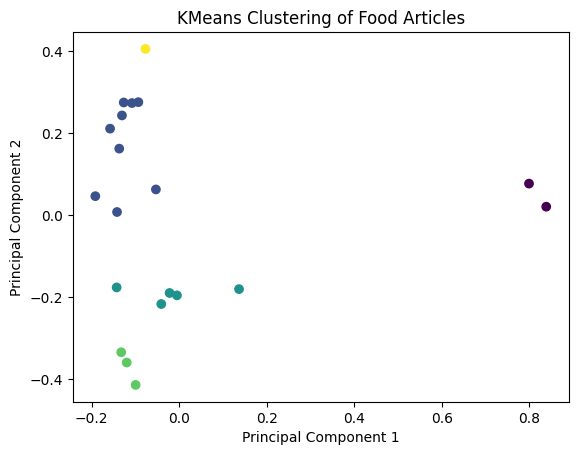

In [14]:
#import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv('/content/food_articles_feature.csv')

# Assuming the TF-IDF features start from the second column
features = df.iloc[:, 1:]

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_features = pca.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
kmeans.fit(reduced_features)
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Food Articles')
plt.show()

In [16]:
reduced_features

array([[-0.1196113 , -0.35903908],
       [-0.12644975,  0.27505755],
       [-0.1075847 ,  0.27370884],
       [-0.1576244 ,  0.21127206],
       [-0.1304394 ,  0.24349718],
       [ 0.83877742,  0.0209709 ],
       [-0.14172589,  0.0080172 ],
       [-0.00480968, -0.19521851],
       [-0.19132524,  0.04667383],
       [-0.07677376,  0.40570261],
       [-0.13216128, -0.33397321],
       [-0.13669018,  0.16257252],
       [-0.09925248, -0.41366646],
       [ 0.79942568,  0.07725836],
       [-0.04056237, -0.21639   ],
       [-0.0216319 , -0.18945756],
       [-0.05291463,  0.06308164],
       [ 0.13700414, -0.18003073],
       [-0.09303794,  0.27590387],
       [-0.14261234, -0.17594099]])

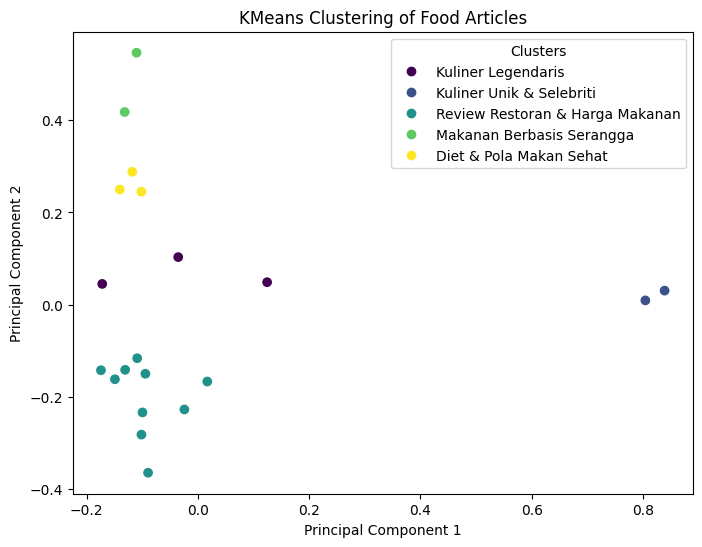

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv('/content/food_articles_feature.csv')

# Assuming the TF-IDF features start from the second column
features = df.iloc[:, 1:]

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_features = pca.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Set number of clusters to 5
kmeans.fit(reduced_features)
labels = kmeans.labels_

# Define cluster names
cluster_names = {
    0: "Kuliner Legendaris",
    1: "Kuliner Unik & Selebriti",
    2: "Review Restoran & Harga Makanan",
    3: "Makanan Berbasis Serangga",
    4: "Diet & Pola Makan Sehat"
}

# Add the cluster labels to the DataFrame
df['cluster'] = labels

df['cluster_name'] = df['cluster'].map(cluster_names)

# Save the DataFrame with cluster labels to a new CSV file
df.to_csv('/content/food_articles_clustered.csv', index=False)

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Food Articles')

# Add legend
legend_labels = [cluster_names[i] for i in range(5)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")
plt.show()

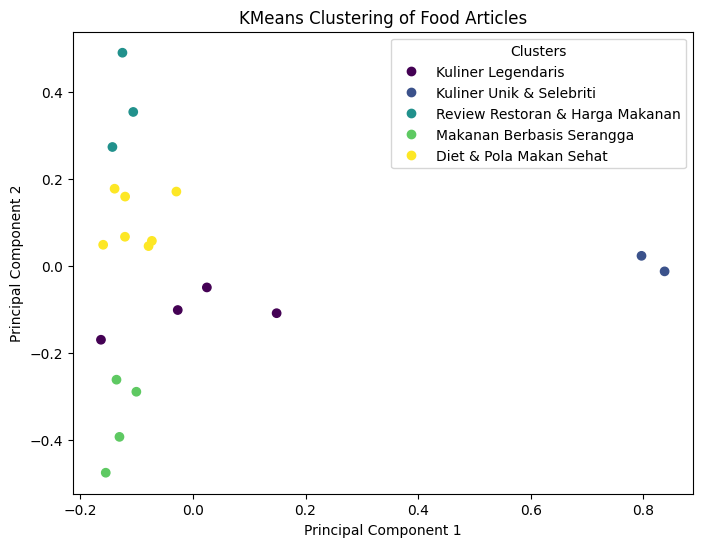

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Accuracy Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

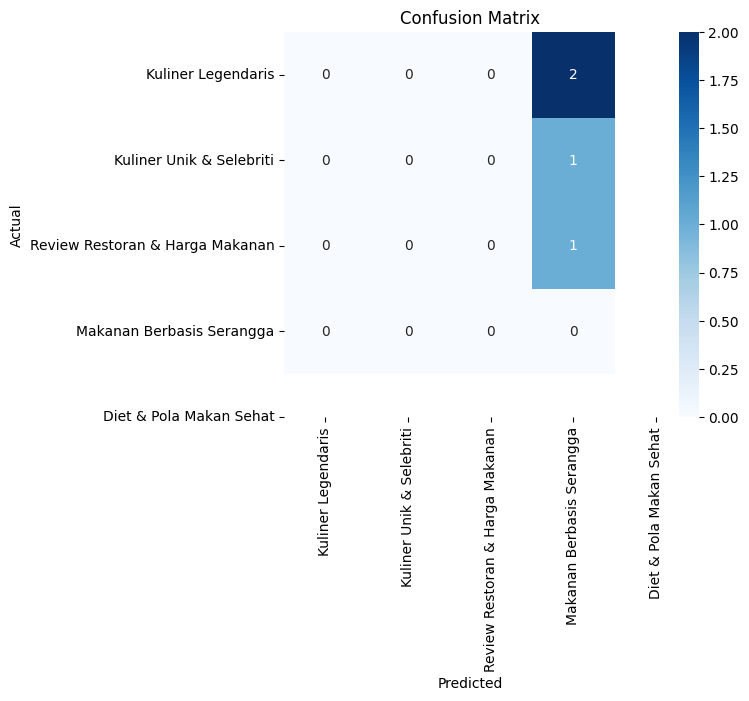

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('/content/food_articles_feature.csv')

# Assuming the TF-IDF features start from the second column
features = df.iloc[:, 1:]

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_features)
labels = kmeans.labels_

# Define cluster names
cluster_names = {
    0: "Kuliner Legendaris",
    1: "Kuliner Unik & Selebriti",
    2: "Review Restoran & Harga Makanan",
    3: "Makanan Berbasis Serangga",
    4: "Diet & Pola Makan Sehat"
}

# Add the cluster labels to the DataFrame
df['cluster'] = labels
df['cluster_name'] = df['cluster'].map(cluster_names)

# Save the DataFrame with cluster labels to a new CSV file
df.to_csv('/content/ArticleFoodClass.csv', index=False)

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Food Articles')
legend_labels = [cluster_names[i] for i in range(5)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")
plt.show()

# Load the labeled data for classification
df = pd.read_csv('/content/ArticleFoodClass.csv')
X = df.iloc[:, 1:-2]
y = df['cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Save the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=cluster_names.values(), yticklabels=cluster_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

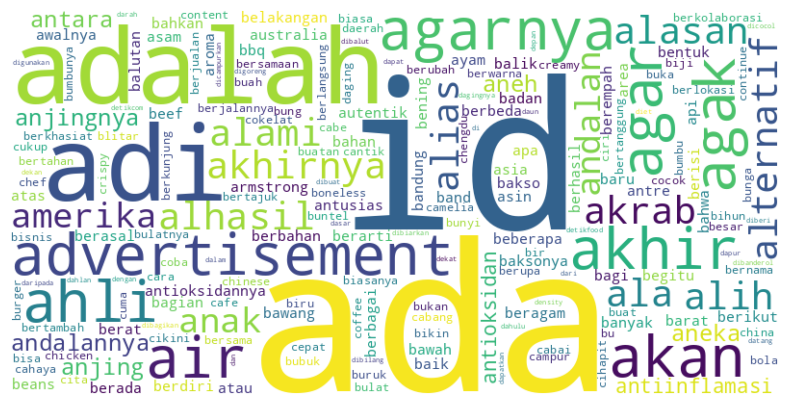

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'clean_content' column
text = " ".join(df.astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()